In [37]:
# import all revelant libraries
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
import numpy as np
import random
from keras.datasets.mnist import load_data
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output
from PIL import Image
import os
from google.colab import drive
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
from __future__ import print_function
from keras import backend as K

In [38]:
# remove the .ipynb_checkpoints which are problematic
!rmdir /content/train/.ipynb_checkpoints
!rmdir /content/test/.ipynb_checkpoints

rmdir: failed to remove '/content/train/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/test/.ipynb_checkpoints': No such file or directory


In [61]:
# specify number or training and testing images
num_train_images = 1190
num_test_images = 30

# sigmoid and inverse sigmoid functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def inv_sigmoid(x):
    return np.log(x/(1-x))

# setting up the image access pipeline
train_path = '/content/train'
test_path = '/content/test'
os.getcwd()

img_list_train = os.listdir(train_path)
img_list_test = os.listdir(test_path)

# image processing function:
# opens each image, resizes it, labels it
def prepare_images(img_list,path,length):
    pixels = []
    imgs = []
    labels = []
    for i in range(length):
        img = Image.open(path+'/'+img_list[i])
        basewidth = 100
        img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
        pix = np.array(img.getdata())
        pixels.append(pix.reshape(100,100,3))
        imgs.append(img)
        if img_list[i].split('_')[0] == "cardinal":
          labels.append(0)
        elif img_list[i].split('_')[0] == "pelican":
          labels.append(1)
        elif img_list[i].split('_')[0] == "eagle":
          labels.append(2)
        elif img_list[i].split('_')[0] == "owl":
          labels.append(3)
        elif img_list[i].split('_')[0] == "sparrow":
          labels.append(3)
        else:
          labels.append("none")
    return np.array(pixels),imgs,np.array(labels)

# processing the training and testing images
train_pixels,train_imgs,train_labels = prepare_images(img_list_train,train_path,num_train_images)
test_pixels,test_imgs,test_labels = prepare_images(img_list_test,test_path,num_test_images)

#verifying that the training labels look accurate
print(train_labels)

[0 0 2 ... 0 1 3]


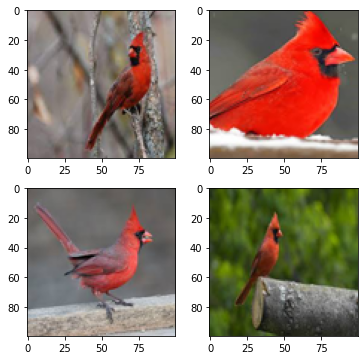

In [8]:
# specify number of rows and columns for sample image viewing
rows = 2
cols = 2

# specify number of possible images to choose from
num_imgs = rows*cols
num_cardinal_imgs = 240

possible_images = []
display_images = []

def display_cardinal_images():
  # adding all the possible image numbers
  for i in range(1, num_cardinal_imgs+1):
    possible_images.append(i)

  # generating four random images to display
  rand1 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand1)
  possible_images.remove(rand1)
  
  rand2 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand2)
  possible_images.remove(rand2)
  
  rand3 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand3)
  possible_images.remove(rand3)
  
  rand4 = random.randint(0, num_cardinal_imgs)
  display_images.append(rand4)
  possible_images.remove(rand4)

# creating the list which specifies the images to display
display_cardinal_images()

# function to reshape the images to the format in which they are fed into the model
def img_reshape(img):
    img = Image.open('cardinal_red_red_'+str(img)+'.jpeg')
    img = img.resize((100,100))
    img = np.asarray(img)
    return img

# adding the images to display to a list
img_array = []
for image in display_images:
  img_array.append(img_reshape(image))

img_count = 0

# creating the plot
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6,6))

# displaying the images
for i in range(rows):
    for j in range(cols):        
        if img_count < int(num_imgs+1):
            axes[i, j].imshow(img_array[img_count])
            img_count+=1

In [5]:
# defining the model
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
# 4 because 4 different classes
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [6]:
# training the model
history = model.fit(train_pixels, train_labels, batch_size=10, epochs=10, validation_data=(test_pixels, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


95/95 [==============================] - 22s 227ms/step - loss: 283.9133 - accuracy: 0.4884 - val_loss: 8.8998 - val_accuracy: 0.6000
Epoch 2/10
95/95 [==============================] - 21s 225ms/step - loss: 2.8715 - accuracy: 0.8053 - val_loss: 14.9292 - val_accuracy: 0.5000
Epoch 3/10
95/95 [==============================] - 22s 228ms/step - loss: 0.1538 - accuracy: 0.9726 - val_loss: 10.5783 - val_accuracy: 0.5333
Epoch 4/10
95/95 [==============================] - 22s 227ms/step - loss: 0.0254 - accuracy: 0.9947 - val_loss: 10.8488 - val_accuracy: 0.5333
Epoch 5/10
95/95 [==============================] - 22s 229ms/step - loss: 0.0103 - accuracy: 0.9979 - val_loss: 10.6630 - val_accuracy: 0.5667
Epoch 6/10
95/95 [==============================] - 22s 229ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 10.7820 - val_accuracy: 0.5667
Epoch 7/10
95/95 [==============================] - 22s 229ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 10.9448 - val_accuracy: 0.5667
Ep

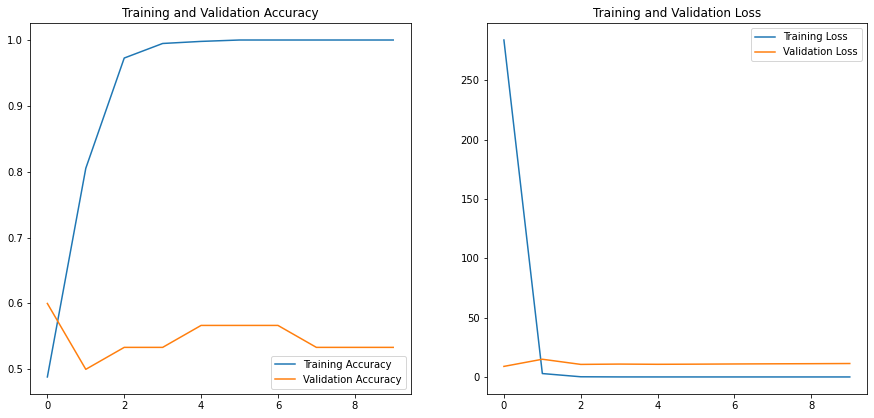

In [9]:
# creating accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

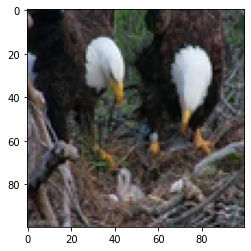

[2.3479803e-09 3.7395641e-06 1.5311996e-06 9.9999475e-01]
eagle_black_yellow_244.jpeg


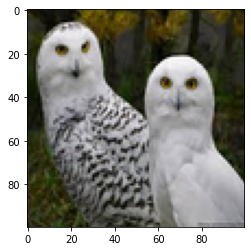

[4.120085e-24 3.350471e-11 7.149683e-22 1.000000e+00]
owl_white_gray_143.jpeg


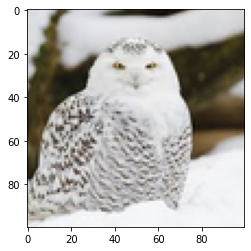

[1.7420009e-09 1.1763956e-11 9.9141252e-01 8.5874824e-03]
owl_white_gray_141.jpeg


In [10]:

testarray = np.array(test_pixels)
prediction = model.predict(testarray)

def show_prediction(img_num):
  testarray = np.array([test_pixels[img_num]])
  prediction = model.predict(testarray)
  plt.figure()
  plt.imshow(train_pixels[img_num])
  plt.show()
  if (prediction[0])[0] > 0.9:
    print("Image is a cardinal!")
  elif (prediction[0])[1] > 0.9:
    print("Image is an pelican!")
  elif (prediction[0])[2] > 0.9:
    print("Image is an eagle!")
  elif (prediction[0])[3] > 0.9:
    print("Image is an owl!")
  else:
    print("Model not confident")

def compare_predictions(num_to_show):
  for i in range(0, num_to_show-1):
    plt.figure()
    plt.imshow(test_pixels[i])
    plt.show()
    print(prediction[i])
    print(img_list_test[i])

compare_predictions(4)

In [36]:
# importing relevant libraries to deploy model in an Anvil webapp
!pip install anvil-uplink
import anvil.server
anvil.server.connect("FJAUQFZHPAEKXKCSJHJOQQ6M-M67RAFW6N6NY77N2")
import cv2
import io
import anvil.media
import PIL

# the function that is called when an image is uploaded using Anvil:
# resizes the image, feeds it through the model, if output probability is > 90%, will classify image
@anvil.server.callable
def classify_image(file):
  pixels = []
  with anvil.media.TempFile(file) as filename:
    img = Image.open(filename)
  basewidth = 100
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  pix = np.array(img.getdata())
  pixels.append(pix.reshape(100,100,3))
  image = np.array(pixels)
  #return (1, image.shape)

  prediction = model.predict(image)
  if (prediction[0])[0] > 0.9:
    return (("Certainty: " + str((prediction[0])[0]*100) + "%"), "Classification: cardinal")
  elif (prediction[0])[1] > 0.9:
    return (("Certainty: " + str((prediction[0])[1]*100) + "%"), "Classification: pelican")
  elif (prediction[0])[2] > 0.9:
    return (("Certainty: " + str((prediction[0])[2]*100) + "%"), "Classification: eagle")
  elif (prediction[0])[3] > 0.9:
    return (("Certainty: " + str((prediction[0])[3]*100) + "%"), "Classification: owl")
  else:
    return ("N/A", "Model not confident")
  
  anvil.server.wait_forever()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Connected to "Default environment" as SERVER


KeyboardInterrupt: ignored